# Proyek Akhir: Klasifikasi Gambar *Rock, Paper, Scissors*
---

Oleh: Mohammad Aditya Rafi Pratama (madityarafip - madityarafip31@gmail.com) - Depok, Indonesia

Pada proyek ini akan dirancang sebuah model Machine Learning yang bertujuan untuk mengklasifikasi gambar sebuah tangan dan memprediksi apakah tangan sedang berada pada gestur *rock*, *paper*, atau *scissors*.
---

---





Proses pertama adalah import library yang digunakan

In [ ]:
from google.colab import files

import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import zipfile,os 

Lalu download dataset gambar yang dibutuhkan, dan mengekstrak data tersebut dan disimpan pada folder temp yang disediakan

In [ ]:
!wget --no-check-certificate \
      https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rockpaperscissors.zip

--2021-06-23 14:48:41--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.78MB/s    in 43s     

2021-06-23 14:49:25 (7.17 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
#Unzip dataset yang digunakan
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
os.listdir('/tmp/rockpaperscissors')

['images',
 'README_rpc-cv-images.txt',
 'rps-cv-images',
 'rock',
 'scissors',
 'paper']

Pada proyek ini data gambar akan dibagi menjadi data train dan data validation dengan ketentuan 60% train dan 40% validation. Library yang digunakan dalam membagi data adalah library split-folders. Sehingga perlu mendownload dan menginstall library terlebih dahulu.

In [ ]:
pip install split-folders


In [ ]:
pip install split-folders tqdm

Setelah library terinstall maka akan dilakukan proses pembagian data.

In [ ]:
import splitfolders
splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', output='/tmp/rockpaperscissors/images', seed=1337, ratio=(.6, .4))

Copying files: 2188 files [00:00, 3484.20 files/s]


Setelah data dibagi, akan dilakukan pendefinisian nama direktori untuk data train dan data validasi.

In [ ]:
base_dir = '/tmp/rockpaperscissors/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
os.listdir(base_dir)

['train', 'val']

In [ ]:
os.listdir('/tmp/rockpaperscissors/images/train')

['rock', 'scissors', 'paper']

In [ ]:
os.listdir('/tmp/rockpaperscissors/images/val')

['rock', 'scissors', 'paper']

Hal selanjutnya adalah menampung direktori dari setiap kelas pada direktori train dan direktori validation ke dalam variabel. Pembuatan direktori di sini akan dipakai saat menggunakan objek fungsi ImageDataGenerator.

In [ ]:
#Membuat direktori pada direktori data training
train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')

#Membuat direktori pada direktori data validasi
validate_rock_dir = os.path.join(validation_dir, 'rock')
validate_paper_dir = os.path.join(validation_dir, 'paper')
validate_scissors_dir = os.path.join(validation_dir, 'scissors')

Proses selanjutnya adalah melakukan proses Augmentasi Gambar menggunakan objek fungsi ImageDataGenerator, yang dimana pada proses ini akan dilakukan juga proses preprocessing data, dan pelabelan sampel otomatis.

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'reflect', #pada proyek akhir ini menggunakan mode reflect
    )
     
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'reflect', #pada proyek akhir ini menggunakan mode reflect
    )

Lalu menggunakan objek image data generator sebelumnya untuk mempersiapkan data latih yang akan dipelajari oleh model.

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data train
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        class_mode='categorical' # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        )  
     
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validation
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, 
        class_mode='categorical' # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        )  

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


Setelah data telah siap, dapat dibangun arsitektur sebuah CNN dengan menggunakan 2 lapis layer konvolusi dan max pooling. Fungsi dari layer konvolusi adalah untuk mengekstraksi atribut pada gambar. Sedangkan layer max pooling berguna untuk mereduksi resolusi gambar sehingga proses pelatihan MLP lebih cepat.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
    ])

Proses selanjutnya adalah mengcompile model dengan fungsi compile.

In [ ]:
# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'
              ])

Sebelum masuk proses melatih/training model dibutuhkan proses callback yang berfungi untuk memberhentikan proses pelatihan ketika mencapai akurasi yang ditentukan, yang dimana pada proyek ini akan berhenti ketika mencapai akurasi >90%.

In [ ]:
class Callback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.90):
            print("\nReached 95% accuracy") 
            self.model.stop_training = True 
     
callbacks = Callback()

Setelah menentukan loss function dan optimizer pada CNN, model dapat dilatih menggunakan metode fit. Dengan menggunakan image data generator, kita tidak perlu memasukkan parameter gambar dan labelnya. Image data generator secara otomatis melabeli sebuah gambar sesuai dengan direktori di mana ia disimpan.

In [ ]:
# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=30, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2,
      callbacks=[callbacks]
      )

Epoch 1/30
25/25 - 9s - loss: 1.1254 - accuracy: 0.3500 - val_loss: 1.0912 - val_accuracy: 0.4500
Epoch 2/30
25/25 - 8s - loss: 1.0969 - accuracy: 0.4000 - val_loss: 1.0793 - val_accuracy: 0.4500
Epoch 3/30
25/25 - 8s - loss: 1.1031 - accuracy: 0.3300 - val_loss: 1.0926 - val_accuracy: 0.4500
Epoch 4/30
25/25 - 8s - loss: 1.0921 - accuracy: 0.4200 - val_loss: 1.0296 - val_accuracy: 0.5500
Epoch 5/30
25/25 - 7s - loss: 1.0343 - accuracy: 0.4900 - val_loss: 1.0921 - val_accuracy: 0.2500
Epoch 6/30
25/25 - 8s - loss: 0.8857 - accuracy: 0.5900 - val_loss: 0.6644 - val_accuracy: 0.8000
Epoch 7/30
25/25 - 8s - loss: 0.5748 - accuracy: 0.7800 - val_loss: 0.3157 - val_accuracy: 0.9000
Epoch 8/30
25/25 - 8s - loss: 0.4810 - accuracy: 0.8300 - val_loss: 0.4915 - val_accuracy: 0.7500
Epoch 9/30
25/25 - 7s - loss: 0.3715 - accuracy: 0.8600 - val_loss: 0.2720 - val_accuracy: 0.9000
Epoch 10/30
25/25 - 8s - loss: 0.3622 - accuracy: 0.8500 - val_loss: 0.1744 - val_accuracy: 0.9500
Epoch 11/30
25/25 -

Setelah proses training selesai akan dilakukan proses testing dengan memberikan gambar gestur *rock*/*paper*/*scissors*. Gambar tadi yang telah diberikan akan diprediksi apakah gambar tersebut merupakan gambar gestur *rock*, *paper*, *scissors* atau bukan.

Saving kertas.jpeg to kertas.jpeg
[[1. 0. 0.]]
kertas.jpeg
Paper


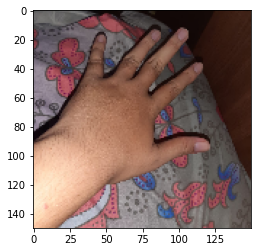

In [ ]:
uploaded = files.upload()
     
for fn in uploaded.keys():
     
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
     
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes)
  print(fn)
  if classes[0][0]==1:
    print('Paper')
  elif classes[0][1]==1:
    print('Rock')
  elif classes[0][2]==1:
    print('Scissors')   
  else:
    print('Unknown hand gestures')  

Hasil dari prediksi dapat dilihat diatas.